In [8]:
import gensim
import gensim
import pandas as pd
import numpy as np
import gzip
import logging
import seaborn as sns
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Tutorial

In [2]:
data_file="reviews_data.txt.gz"

with gzip.open (data_file, 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

In [4]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (data_file))
logging.info ("Done reading data file") 

2023-03-08 11:58:02,722 : INFO : reading file reviews_data.txt.gz...this may take a while
2023-03-08 11:58:02,725 : INFO : read 0 reviews
2023-03-08 11:58:04,475 : INFO : read 10000 reviews
2023-03-08 11:58:06,196 : INFO : read 20000 reviews
2023-03-08 11:58:08,195 : INFO : read 30000 reviews
2023-03-08 11:58:10,061 : INFO : read 40000 reviews
2023-03-08 11:58:12,130 : INFO : read 50000 reviews
2023-03-08 11:58:14,334 : INFO : read 60000 reviews
2023-03-08 11:58:16,007 : INFO : read 70000 reviews
2023-03-08 11:58:17,527 : INFO : read 80000 reviews
2023-03-08 11:58:19,144 : INFO : read 90000 reviews
2023-03-08 11:58:20,744 : INFO : read 100000 reviews
2023-03-08 11:58:22,331 : INFO : read 110000 reviews
2023-03-08 11:58:23,986 : INFO : read 120000 reviews
2023-03-08 11:58:25,593 : INFO : read 130000 reviews
2023-03-08 11:58:27,394 : INFO : read 140000 reviews
2023-03-08 11:58:28,976 : INFO : read 150000 reviews
2023-03-08 11:58:32,618 : INFO : read 160000 reviews
2023-03-08 11:58:34,215

In [8]:
model = gensim.models.Word2Vec (documents, vector_size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=1)

2023-03-08 12:00:30,401 : INFO : collecting all words and their counts
2023-03-08 12:00:30,403 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-08 12:00:30,671 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2023-03-08 12:00:30,934 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2023-03-08 12:00:31,246 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2023-03-08 12:00:31,531 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2023-03-08 12:00:31,848 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2023-03-08 12:00:32,169 : INFO : PROGRESS: at sentence #60000, processed 11013727 words, keeping 76787 word types
2023-03-08 12:00:32,436 : INFO : PROGRESS: at sentence #70000, processed 12637529 words, keeping 83200 word types
2023-03-08 12:00:32,675 : INFO : PROG

2023-03-08 12:01:04,077 : INFO : EPOCH 1 - PROGRESS: at 47.63% examples, 1851630 words/s, in_qsize 18, out_qsize 1
2023-03-08 12:01:05,087 : INFO : EPOCH 1 - PROGRESS: at 53.83% examples, 1847808 words/s, in_qsize 17, out_qsize 2
2023-03-08 12:01:06,095 : INFO : EPOCH 1 - PROGRESS: at 59.79% examples, 1832382 words/s, in_qsize 17, out_qsize 2
2023-03-08 12:01:07,098 : INFO : EPOCH 1 - PROGRESS: at 65.98% examples, 1826945 words/s, in_qsize 20, out_qsize 0
2023-03-08 12:01:08,098 : INFO : EPOCH 1 - PROGRESS: at 70.85% examples, 1797582 words/s, in_qsize 19, out_qsize 0
2023-03-08 12:01:09,107 : INFO : EPOCH 1 - PROGRESS: at 76.40% examples, 1786657 words/s, in_qsize 18, out_qsize 1
2023-03-08 12:01:10,108 : INFO : EPOCH 1 - PROGRESS: at 81.74% examples, 1776765 words/s, in_qsize 19, out_qsize 0
2023-03-08 12:01:11,126 : INFO : EPOCH 1 - PROGRESS: at 87.15% examples, 1764112 words/s, in_qsize 17, out_qsize 2
2023-03-08 12:01:12,133 : INFO : EPOCH 1 - PROGRESS: at 92.58% examples, 1749307

2023-03-08 12:02:06,301 : WARNING : Effective 'alpha' higher than previous training cycles
2023-03-08 12:02:06,301 : INFO : Word2Vec lifecycle event {'msg': 'training model with 10 workers on 70537 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10 shrink_windows=True', 'datetime': '2023-03-08T12:02:06.301953', 'gensim': '4.2.0', 'python': '3.9.1 (v3.9.1:1e5d33e9b9, Dec  7 2020, 12:10:52) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2023-03-08 12:02:07,311 : INFO : EPOCH 0 - PROGRESS: at 5.92% examples, 1821374 words/s, in_qsize 20, out_qsize 0
2023-03-08 12:02:08,312 : INFO : EPOCH 0 - PROGRESS: at 11.35% examples, 1825512 words/s, in_qsize 19, out_qsize 0
2023-03-08 12:02:09,321 : INFO : EPOCH 0 - PROGRESS: at 16.33% examples, 1799564 words/s, in_qsize 19, out_qsize 1
2023-03-08 12:02:10,326 : INFO : EPOCH 0 - PROGRESS: at 21.43% examples, 1804616 words/s, in_qsize 19, out_qsize 0
2023-03-08 12:02:11,329 :

(30346970, 41519359)

In [9]:
w1 = "dirty"
model.wv.most_similar (positive=w1)

[('filthy', 0.8653646111488342),
 ('unclean', 0.7826085090637207),
 ('stained', 0.755523681640625),
 ('smelly', 0.7432677745819092),
 ('dusty', 0.7420288324356079),
 ('grubby', 0.7264119386672974),
 ('soiled', 0.7187577486038208),
 ('disgusting', 0.711033821105957),
 ('disgustingly', 0.6961562633514404),
 ('moldy', 0.6924386620521545)]

In [10]:
w1 = ["polite"]
model.wv.most_similar (positive=w1,topn=6)

[('courteous', 0.8818655610084534),
 ('cordial', 0.8256106376647949),
 ('curteous', 0.8198858499526978),
 ('friendly', 0.7948161959648132),
 ('curtious', 0.7921111583709717),
 ('freindly', 0.7838779091835022)]

In [11]:
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('germany', 0.7084828019142151),
 ('canada', 0.6951631307601929),
 ('england', 0.6655834317207336),
 ('austria', 0.6519680619239807),
 ('ireland', 0.6512348055839539),
 ('mexico', 0.6391814947128296)]

In [12]:
w1 = ["shocked"]
model.wv.most_similar (positive=w1,topn=6)

[('amazed', 0.8108350038528442),
 ('horrified', 0.8008638620376587),
 ('suprised', 0.7529677748680115),
 ('appalled', 0.7525407671928406),
 ('astonished', 0.7501817345619202),
 ('stunned', 0.746991753578186)]

In [13]:
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('duvet', 0.7157604694366455),
 ('blanket', 0.7041473984718323),
 ('pillowcase', 0.6929316520690918),
 ('quilt', 0.6918755173683167),
 ('mattress', 0.6766456365585327),
 ('matress', 0.6733872294425964),
 ('foam', 0.6560038328170776),
 ('pillows', 0.6207405924797058),
 ('pillowcases', 0.6039043664932251),
 ('sheets', 0.6026749610900879)]

In [14]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

0.74326783

In [15]:
# similarity between two identical words
model.wv.similarity(w1="dirty",w2="dirty")

0.99999994

In [16]:
model.wv.similarity(w1="dirty",w2="clean")

0.25484544

In [17]:
model.wv.doesnt_match(["cat","dog","france"])

'france'

In [18]:
model.wv.doesnt_match(["bed","pillow","duvet","shower"])

'shower'

# Question 2

In [2]:
#read in dataset
imdb=pd.read_csv('IMDB Dataset.csv')
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


The Sentiment of each review is given in our dataset, positive and negative are converted to 1 and 0, this helps run logit on our dataset

In [3]:
target_vals=imdb['sentiment'].value_counts().reset_index()

<AxesSubplot:xlabel='index', ylabel='sentiment'>

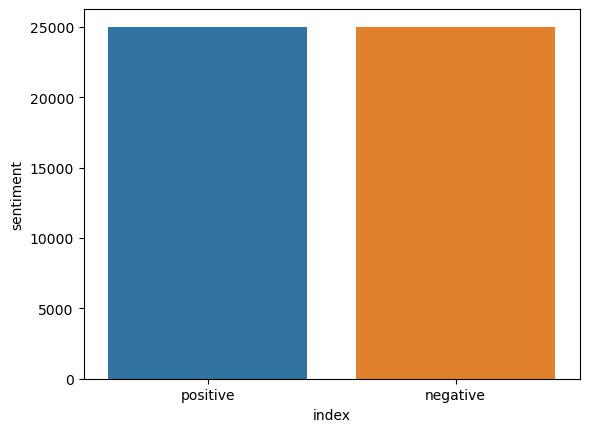

In [9]:
sns.barplot(x='index',y='sentiment',data=target_vals)

In [10]:
#Converting Columns into a list of tokens
#converts all elements into unicode strings
from gensim.utils import simple_preprocess
imdb['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in imdb['review']]
print(imdb['tokenized_text'].head(10))

0    [one, of, the, other, reviewers, has, mentione...
1    [wonderful, little, production, br, br, the, f...
2    [thought, this, was, wonderful, way, to, spend...
3    [basically, there, family, where, little, boy,...
4    [petter, mattei, love, in, the, time, of, mone...
5    [probably, my, all, time, favorite, movie, sto...
6    [sure, would, like, to, see, resurrection, of,...
7    [this, show, was, an, amazing, fresh, innovati...
8    [encouraged, by, the, positive, comments, abou...
9    [if, you, like, original, gut, wrenching, laug...
Name: tokenized_text, dtype: object


In [11]:
#import porterstemmer a suffix stripping algorithm
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed unicode values for each column
imdb['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in imdb['tokenized_text'] ]
imdb['stemmed_tokens'].head(10)

0    [on, of, the, other, review, ha, mention, that...
1    [wonder, littl, product, br, br, the, film, te...
2    [thought, thi, wa, wonder, wai, to, spend, tim...
3    [basic, there, famili, where, littl, boi, jake...
4    [petter, mattei, love, in, the, time, of, mone...
5    [probabl, my, all, time, favorit, movi, stori,...
6    [sure, would, like, to, see, resurrect, of, up...
7    [thi, show, wa, an, amaz, fresh, innov, idea, ...
8    [encourag, by, the, posit, comment, about, thi...
9    [if, you, like, origin, gut, wrench, laughter,...
Name: stemmed_tokens, dtype: object

We also now split our train and test data sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(imdb['stemmed_tokens'], 
                                                        imdb['sentiment'], 
                                                        shuffle=True,
                                                        test_size=0.2, 
                                                        random_state=15)

## Preprocessing

Basic preprocessing was conducted such as converting all words to lowercase, stemming, and tokenizing all words so that they can be more easily represented as one-hot encoded vectors that can be passed into our word2vec model

# Question 3

## Part 1

Fitting our Word2Vec model on all stemmed tokens

In [16]:
stemmed_tokens = pd.Series(imdb['stemmed_tokens']).values
w2v_model = gensim.models.Word2Vec (stemmed_tokens, vector_size=100, window=5, min_count=5, sg=1)

2023-03-13 22:03:44,191 : INFO : collecting all words and their counts
2023-03-13 22:03:44,194 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 22:03:44,719 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-13 22:03:45,243 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-13 22:03:45,764 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-13 22:03:46,295 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-13 22:03:46,829 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-13 22:03:46,829 : INFO : Creating a fresh vocabulary
2023-03-13 22:03:46,939 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.63524078002848%% of original 68818, drops 42230)', 'datetime': '2023-03-13T22:03:

2023-03-13 22:04:30,344 : INFO : EPOCH 3 - PROGRESS: at 32.37% examples, 445808 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:04:31,359 : INFO : EPOCH 3 - PROGRESS: at 37.18% examples, 437996 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:04:32,373 : INFO : EPOCH 3 - PROGRESS: at 42.10% examples, 434643 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:04:33,377 : INFO : EPOCH 3 - PROGRESS: at 47.30% examples, 434384 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:04:34,389 : INFO : EPOCH 3 - PROGRESS: at 52.90% examples, 436800 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:04:35,394 : INFO : EPOCH 3 - PROGRESS: at 58.53% examples, 439095 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:04:36,401 : INFO : EPOCH 3 - PROGRESS: at 63.96% examples, 440965 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:04:37,409 : INFO : EPOCH 3 - PROGRESS: at 69.55% examples, 442395 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:04:38,441 : INFO : EPOCH 3 - PROGRESS: at 75.15% examples, 443002 words/s, in_qsiz

Function to create document vectors by averaging all word vectors, we create an empty list, subset to only words that appear in the W2V corpus, loop through the full length of values, append to a numpy list and then change it back to a dataframe for further use:


In [18]:
def create_doc_vec(X):  
    doc_vec=[]
    for i in range(0, len(X)):
        w2v_words=[word for word in X.iloc[i] if (word in w2v_model.wv.index_to_key)]
        doc_vec.append((np.mean([w2v_model.wv[token] for token in w2v_words], axis=0)).tolist())
    return pd.DataFrame(doc_vec)

In [19]:
w2v_embed_df_train=create_doc_vec(X_train)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1)
logreg.fit(w2v_embed_df_train, Y_train)

/Users/arjunvelmurugan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=1)

In [21]:
from sklearn.metrics import classification_report

In [22]:
#evaluate performance on test set
doc_vec_test=create_doc_vec(X_test)
test_predictions_word2vec = logreg.predict(doc_vec_test)
print(classification_report(Y_test,test_predictions_word2vec))

              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      4988
    positive       0.87      0.86      0.86      5012

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [23]:
train_predictions_word2vec=logreg.predict(w2v_embed_df_train)
classification_report(Y_train, train_predictions_word2vec, output_dict=True)['accuracy']

0.866275

In [24]:
classification_report(Y_test, test_predictions_word2vec, output_dict=True)['accuracy']

0.863

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, test_predictions_word2vec)
print(confusion_matrix)

[[4317  671]
 [ 699 4313]]


## Analysis:

We have a balanced set of classes and a very decent confusion matrix, 86% is quite decent. We have a good classifier on our hands

## Part 2

In [26]:
#loop through output size
test_acc=[]
train_acc=[]
for i in [25, 50, 100, 150]:
    #fit w2v model
    w2v_model = gensim.models.Word2Vec (stemmed_tokens, vector_size=i, window=5, min_count=5, sg=1)
    #create doc embeddings df
    w2v_embed_df_train=create_doc_vec(X_train)
    #fit logit
    logreg = LogisticRegression(n_jobs=1)
    logreg.fit(w2v_embed_df_train, Y_train)
    #create test doc vectors
    doc_vec_test=create_doc_vec(X_test)
    #evaluate predictions
    test_predictions_word2vec = logreg.predict(doc_vec_test)
    train_predictions_word2vec = logreg.predict(w2v_embed_df_train)
    print('CLASSIFICATION REPORT FOR SIZE=',i)
    print(classification_report(Y_test,test_predictions_word2vec))
    test_acc.append(classification_report(Y_test, test_predictions_word2vec, output_dict=True)['accuracy'])
    train_acc.append(classification_report(Y_train, train_predictions_word2vec, output_dict=True)['accuracy'])

2023-03-13 22:24:57,194 : INFO : collecting all words and their counts
2023-03-13 22:24:57,195 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 22:24:57,545 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-13 22:24:57,887 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-13 22:24:58,243 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-13 22:24:58,602 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-13 22:24:58,976 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-13 22:24:58,977 : INFO : Creating a fresh vocabulary
2023-03-13 22:24:59,092 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.63524078002848%% of original 68818, drops 42230)', 'datetime': '2023-03-13T22:24:

2023-03-13 22:25:42,004 : INFO : EPOCH 3 - PROGRESS: at 72.04% examples, 541560 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:25:43,014 : INFO : EPOCH 3 - PROGRESS: at 78.80% examples, 542819 words/s, in_qsize 6, out_qsize 0
2023-03-13 22:25:44,021 : INFO : EPOCH 3 - PROGRESS: at 85.45% examples, 543761 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:25:45,033 : INFO : EPOCH 3 - PROGRESS: at 92.00% examples, 544216 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:25:46,050 : INFO : EPOCH 3 - PROGRESS: at 98.60% examples, 543835 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:25:46,225 : INFO : worker thread finished; awaiting finish of 2 more threads
2023-03-13 22:25:46,254 : INFO : worker thread finished; awaiting finish of 1 more threads
2023-03-13 22:25:46,256 : INFO : worker thread finished; awaiting finish of 0 more threads
2023-03-13 22:25:46,257 : INFO : EPOCH - 3 : training on 11176467 raw words (8368857 effective words) took 15.4s, 544103 effective words/s
2023-03-13 22:25:47,283

CLASSIFICATION REPORT FOR SIZE= 25
              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      4988
    positive       0.83      0.83      0.83      5012

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



2023-03-13 22:31:31,738 : INFO : collecting all words and their counts
2023-03-13 22:31:31,740 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 22:31:32,150 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-13 22:31:32,635 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-13 22:31:33,113 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-13 22:31:33,600 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-13 22:31:34,077 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-13 22:31:34,078 : INFO : Creating a fresh vocabulary
2023-03-13 22:31:34,184 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.63524078002848%% of original 68818, drops 42230)', 'datetime': '2023-03-13T22:31:

2023-03-13 22:32:16,563 : INFO : EPOCH 3 - PROGRESS: at 54.76% examples, 503482 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:32:17,588 : INFO : EPOCH 3 - PROGRESS: at 61.08% examples, 504966 words/s, in_qsize 6, out_qsize 0
2023-03-13 22:32:18,588 : INFO : EPOCH 3 - PROGRESS: at 67.19% examples, 505240 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:32:19,602 : INFO : EPOCH 3 - PROGRESS: at 73.27% examples, 504902 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:32:20,603 : INFO : EPOCH 3 - PROGRESS: at 79.43% examples, 505259 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:32:21,608 : INFO : EPOCH 3 - PROGRESS: at 85.53% examples, 505706 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:32:22,611 : INFO : EPOCH 3 - PROGRESS: at 91.53% examples, 506104 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:32:23,624 : INFO : EPOCH 3 - PROGRESS: at 97.71% examples, 505997 words/s, in_qsize 6, out_qsize 0
2023-03-13 22:32:23,972 : INFO : worker thread finished; awaiting finish of 2 more threads
2023-

CLASSIFICATION REPORT FOR SIZE= 50
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4988
    positive       0.85      0.85      0.85      5012

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



2023-03-13 22:37:57,425 : INFO : collecting all words and their counts
2023-03-13 22:37:57,425 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 22:37:57,728 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-13 22:37:58,034 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-13 22:37:58,349 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-13 22:37:58,645 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-13 22:37:58,956 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-13 22:37:58,957 : INFO : Creating a fresh vocabulary
2023-03-13 22:37:59,063 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.63524078002848%% of original 68818, drops 42230)', 'datetime': '2023-03-13T22:37:

2023-03-13 22:38:42,445 : INFO : EPOCH 3 - PROGRESS: at 25.62% examples, 427243 words/s, in_qsize 6, out_qsize 0
2023-03-13 22:38:43,471 : INFO : EPOCH 3 - PROGRESS: at 30.91% examples, 427720 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:38:44,508 : INFO : EPOCH 3 - PROGRESS: at 36.23% examples, 427393 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:38:45,511 : INFO : EPOCH 3 - PROGRESS: at 41.15% examples, 425926 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:38:46,538 : INFO : EPOCH 3 - PROGRESS: at 46.15% examples, 423880 words/s, in_qsize 6, out_qsize 0
2023-03-13 22:38:47,553 : INFO : EPOCH 3 - PROGRESS: at 51.18% examples, 422871 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:38:48,569 : INFO : EPOCH 3 - PROGRESS: at 56.22% examples, 422036 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:38:49,575 : INFO : EPOCH 3 - PROGRESS: at 61.43% examples, 422918 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:38:50,592 : INFO : EPOCH 3 - PROGRESS: at 66.56% examples, 422702 words/s, in_qsiz

CLASSIFICATION REPORT FOR SIZE= 100
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4988
    positive       0.86      0.86      0.86      5012

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



2023-03-13 22:44:37,653 : INFO : collecting all words and their counts
2023-03-13 22:44:37,654 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 22:44:37,947 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-13 22:44:38,242 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-13 22:44:38,536 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-13 22:44:38,849 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-13 22:44:39,173 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-13 22:44:39,174 : INFO : Creating a fresh vocabulary
2023-03-13 22:44:39,280 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.63524078002848%% of original 68818, drops 42230)', 'datetime': '2023-03-13T22:44:

2023-03-13 22:45:21,946 : INFO : EPOCH - 2 : training on 11176467 raw words (8367317 effective words) took 21.5s, 389535 effective words/s
2023-03-13 22:45:22,955 : INFO : EPOCH 3 - PROGRESS: at 4.68% examples, 382406 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:45:23,958 : INFO : EPOCH 3 - PROGRESS: at 9.37% examples, 389314 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:45:24,974 : INFO : EPOCH 3 - PROGRESS: at 14.01% examples, 390212 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:45:26,015 : INFO : EPOCH 3 - PROGRESS: at 18.48% examples, 382453 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:45:27,019 : INFO : EPOCH 3 - PROGRESS: at 22.74% examples, 377687 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:45:28,021 : INFO : EPOCH 3 - PROGRESS: at 27.11% examples, 374631 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:45:29,037 : INFO : EPOCH 3 - PROGRESS: at 31.71% examples, 375054 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:45:30,049 : INFO : EPOCH 3 - PROGRESS: at 36.49% examples,

2023-03-13 22:46:26,440 : INFO : worker thread finished; awaiting finish of 0 more threads
2023-03-13 22:46:26,441 : INFO : EPOCH - 5 : training on 11176467 raw words (8368276 effective words) took 21.3s, 392674 effective words/s
2023-03-13 22:46:26,441 : INFO : Word2Vec lifecycle event {'msg': 'training on 55882335 raw words (41838878 effective words) took 106.8s, 391919 effective words/s', 'datetime': '2023-03-13T22:46:26.441972', 'gensim': '4.1.2', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2023-03-13 22:46:26,442 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec(vocab=26588, vector_size=150, alpha=0.025)', 'datetime': '2023-03-13T22:46:26.442417', 'gensim': '4.1.2', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
/Users/arjunvelmurugan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic

CLASSIFICATION REPORT FOR SIZE= 150
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      4988
    positive       0.87      0.87      0.87      5012

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Analysis:

Increase in vector size results in subsequent increase in accuracy. The more compressed the vector is, the more context is lost within the language. In the plot below, we can see improvements in accuracy with vector size.

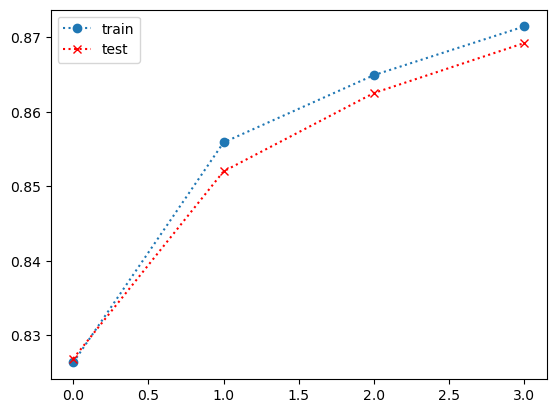

In [28]:
import matplotlib.pyplot as plt
d={"train":train_acc,
  "test":test_acc}
acc_df=pd.DataFrame(d)
acc_df.plot(style=['o','rx'], linestyle = 'dotted')
plt.show()

## Part 3

In [29]:
#Loop through window size
test_acc2=[]
train_acc2=[]
for i in [2, 3, 5, 10]:
    #fit w2v model
    w2v_model = gensim.models.Word2Vec (stemmed_tokens, vector_size=100, window=i, min_count=5, sg=1)
    #create doc embeddings train df
    w2v_embed_df_train=create_doc_vec(X_train)
    #fit logit
    logreg = LogisticRegression(n_jobs=1)
    logreg.fit(w2v_embed_df_train, Y_train)
    #create doc embeddings test df
    doc_vec_test=create_doc_vec(X_test)
    #evaluate performance
    test_predictions_word2vec = logreg.predict(doc_vec_test)
    train_predictions_word2vec = logreg.predict(w2v_embed_df_train)
    print('CLASSIFICATION REPORT FOR WINDOW=',i)
    print(classification_report(Y_test,test_predictions_word2vec))
    test_acc2.append(classification_report(Y_test, test_predictions_word2vec, output_dict=True)['accuracy'])
    train_acc2.append(classification_report(Y_train, train_predictions_word2vec, output_dict=True)['accuracy'])

2023-03-13 22:51:37,400 : INFO : collecting all words and their counts
2023-03-13 22:51:37,401 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 22:51:37,777 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-13 22:51:38,179 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-13 22:51:38,582 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-13 22:51:38,901 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-13 22:51:39,212 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-13 22:51:39,213 : INFO : Creating a fresh vocabulary
2023-03-13 22:51:39,320 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.63524078002848%% of original 68818, drops 42230)', 'datetime': '2023-03-13T22:51:

2023-03-13 22:52:17,750 : INFO : EPOCH 4 - PROGRESS: at 69.73% examples, 828413 words/s, in_qsize 6, out_qsize 0
2023-03-13 22:52:18,759 : INFO : EPOCH 4 - PROGRESS: at 79.87% examples, 829166 words/s, in_qsize 6, out_qsize 2
2023-03-13 22:52:19,773 : INFO : EPOCH 4 - PROGRESS: at 89.93% examples, 830911 words/s, in_qsize 6, out_qsize 0
2023-03-13 22:52:20,744 : INFO : worker thread finished; awaiting finish of 2 more threads
2023-03-13 22:52:20,747 : INFO : worker thread finished; awaiting finish of 1 more threads
2023-03-13 22:52:20,761 : INFO : worker thread finished; awaiting finish of 0 more threads
2023-03-13 22:52:20,762 : INFO : EPOCH - 4 : training on 11176467 raw words (8367750 effective words) took 10.1s, 832167 effective words/s
2023-03-13 22:52:21,770 : INFO : EPOCH 5 - PROGRESS: at 9.95% examples, 830103 words/s, in_qsize 6, out_qsize 0
2023-03-13 22:52:22,778 : INFO : EPOCH 5 - PROGRESS: at 20.15% examples, 838291 words/s, in_qsize 6, out_qsize 0
2023-03-13 22:52:23,779 

CLASSIFICATION REPORT FOR WINDOW= 2
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4988
    positive       0.85      0.85      0.85      5012

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



2023-03-13 22:57:22,790 : INFO : collecting all words and their counts
2023-03-13 22:57:22,791 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 22:57:23,093 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-13 22:57:23,404 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-13 22:57:23,698 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-13 22:57:23,990 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-13 22:57:24,287 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-13 22:57:24,288 : INFO : Creating a fresh vocabulary
2023-03-13 22:57:24,394 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.63524078002848%% of original 68818, drops 42230)', 'datetime': '2023-03-13T22:57:

2023-03-13 22:58:04,230 : INFO : worker thread finished; awaiting finish of 0 more threads
2023-03-13 22:58:04,230 : INFO : EPOCH - 3 : training on 11176467 raw words (8368964 effective words) took 13.4s, 626807 effective words/s
2023-03-13 22:58:05,250 : INFO : EPOCH 4 - PROGRESS: at 7.80% examples, 639300 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:58:06,262 : INFO : EPOCH 4 - PROGRESS: at 15.62% examples, 646300 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:58:07,267 : INFO : EPOCH 4 - PROGRESS: at 23.12% examples, 640470 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:58:08,284 : INFO : EPOCH 4 - PROGRESS: at 30.37% examples, 628650 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:58:09,294 : INFO : EPOCH 4 - PROGRESS: at 37.90% examples, 626572 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:58:10,297 : INFO : EPOCH 4 - PROGRESS: at 45.53% examples, 629409 words/s, in_qsize 5, out_qsize 0
2023-03-13 22:58:11,308 : INFO : EPOCH 4 - PROGRESS: at 53.52% examples, 633293 words/s, in_q

CLASSIFICATION REPORT FOR WINDOW= 3
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4988
    positive       0.85      0.85      0.85      5012

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



2023-03-13 23:03:36,565 : INFO : collecting all words and their counts
2023-03-13 23:03:36,567 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 23:03:36,910 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-13 23:03:37,286 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-13 23:03:37,656 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-13 23:03:38,021 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-13 23:03:38,368 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-13 23:03:38,368 : INFO : Creating a fresh vocabulary
2023-03-13 23:03:38,474 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.63524078002848%% of original 68818, drops 42230)', 'datetime': '2023-03-13T23:03:

2023-03-13 23:04:22,279 : INFO : EPOCH 3 - PROGRESS: at 31.71% examples, 433295 words/s, in_qsize 6, out_qsize 0
2023-03-13 23:04:23,307 : INFO : EPOCH 3 - PROGRESS: at 37.27% examples, 435792 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:04:24,322 : INFO : EPOCH 3 - PROGRESS: at 42.73% examples, 438098 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:04:25,330 : INFO : EPOCH 3 - PROGRESS: at 48.23% examples, 439821 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:04:26,338 : INFO : EPOCH 3 - PROGRESS: at 53.52% examples, 439663 words/s, in_qsize 6, out_qsize 0
2023-03-13 23:04:27,342 : INFO : EPOCH 3 - PROGRESS: at 58.88% examples, 439760 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:04:28,347 : INFO : EPOCH 3 - PROGRESS: at 63.96% examples, 439241 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:04:29,353 : INFO : EPOCH 3 - PROGRESS: at 69.27% examples, 439237 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:04:30,373 : INFO : EPOCH 3 - PROGRESS: at 74.07% examples, 435652 words/s, in_qsiz

CLASSIFICATION REPORT FOR WINDOW= 5
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4988
    positive       0.86      0.86      0.86      5012

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



2023-03-13 23:10:06,664 : INFO : collecting all words and their counts
2023-03-13 23:10:06,665 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 23:10:06,970 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-13 23:10:07,276 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-13 23:10:07,576 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-13 23:10:07,876 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-13 23:10:08,180 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-13 23:10:08,181 : INFO : Creating a fresh vocabulary
2023-03-13 23:10:08,286 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.63524078002848%% of original 68818, drops 42230)', 'datetime': '2023-03-13T23:10:

2023-03-13 23:10:55,647 : INFO : EPOCH 2 - PROGRESS: at 42.29% examples, 245953 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:10:56,658 : INFO : EPOCH 2 - PROGRESS: at 45.44% examples, 247010 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:10:57,670 : INFO : EPOCH 2 - PROGRESS: at 48.63% examples, 247957 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:10:58,684 : INFO : EPOCH 2 - PROGRESS: at 51.76% examples, 248759 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:10:59,718 : INFO : EPOCH 2 - PROGRESS: at 55.03% examples, 249182 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:11:00,723 : INFO : EPOCH 2 - PROGRESS: at 58.15% examples, 249574 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:11:01,725 : INFO : EPOCH 2 - PROGRESS: at 61.08% examples, 249624 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:11:02,726 : INFO : EPOCH 2 - PROGRESS: at 64.05% examples, 249664 words/s, in_qsize 6, out_qsize 0
2023-03-13 23:11:03,756 : INFO : EPOCH 2 - PROGRESS: at 67.28% examples, 250017 words/s, in_qsiz

2023-03-13 23:12:03,979 : INFO : EPOCH 4 - PROGRESS: at 45.95% examples, 249380 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:12:04,980 : INFO : EPOCH 4 - PROGRESS: at 48.91% examples, 249022 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:12:06,041 : INFO : EPOCH 4 - PROGRESS: at 51.76% examples, 247824 words/s, in_qsize 6, out_qsize 0
2023-03-13 23:12:07,057 : INFO : EPOCH 4 - PROGRESS: at 54.76% examples, 247359 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:12:08,105 : INFO : EPOCH 4 - PROGRESS: at 57.98% examples, 247703 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:12:09,111 : INFO : EPOCH 4 - PROGRESS: at 61.08% examples, 248493 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:12:10,116 : INFO : EPOCH 4 - PROGRESS: at 64.20% examples, 249209 words/s, in_qsize 6, out_qsize 0
2023-03-13 23:12:11,123 : INFO : EPOCH 4 - PROGRESS: at 67.48% examples, 249830 words/s, in_qsize 5, out_qsize 0
2023-03-13 23:12:12,148 : INFO : EPOCH 4 - PROGRESS: at 70.63% examples, 250194 words/s, in_qsiz

CLASSIFICATION REPORT FOR WINDOW= 10
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      4988
    positive       0.87      0.87      0.87      5012

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



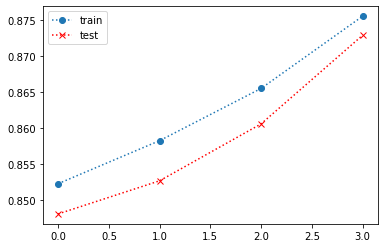

In [120]:
d={"train":train_acc2,
  "test":test_acc2}
acc_df=pd.DataFrame(d)
acc_df.plot(style=['o','rx'], linestyle = 'dotted')
plt.show()

## Analysis

There is marginal increase in accuracy with large increase in window size, window size doesn't affect our model as much.

# Question 4

## Part 1

An RNN is good for analyzing text data, like in sentiment analysis, because it can remember the context of previous words when analyzing the next word. For example, in the sentence "I love pizza, but I hate broccoli," an RNN can use the context of "love" to understand that "pizza" is positive and the context of "hate" to understand that "broccoli" is negative, even though they are far apart in the sentence.

## Part 2

In [ ]:
#import packages
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras import layers
import tensorflow as tf
from keras.utils import pad_sequences

In [11]:
#set parameters
max_words = 1000
max_len = 150
#tokenize text
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
#convert to sequence
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [75]:
#define simple architecture
model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_len))
model.add(LSTM(300))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [26]:
#label encode y variable
le=LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_train = Y_train.reshape(-1,1)

/Users/jakebrophy/miniforge3/envs/myenv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
history=model.fit(sequences_matrix,Y_train,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 93s 740ms/step - loss: 0.6618 - accuracy: 0.5902 - val_loss: 0.5526 - val_accuracy: 0.7495
Epoch 2/10
125/125 [==============================] - 91s 730ms/step - loss: 0.3833 - accuracy: 0.8336 - val_loss: 0.4172 - val_accuracy: 0.8179
Epoch 3/10
125/125 [==============================] - 90s 721ms/step - loss: 0.3327 - accuracy: 0.8603 - val_loss: 0.3480 - val_accuracy: 0.8530
Epoch 4/10
125/125 [==============================] - 93s 743ms/step - loss: 0.3209 - accuracy: 0.8635 - val_loss: 0.3488 - val_accuracy: 0.8443
Epoch 5/10
125/125 [==============================] - 95s 758ms/step - loss: 0.3187 - accuracy: 0.8661 - val_loss: 0.3435 - val_accuracy: 0.8512
Epoch 6/10
125/125 [==============================] - 89s 715ms/step - loss: 0.3042 - accuracy: 0.8713 - val_loss: 0.3572 - val_accuracy: 0.8451
Epoch 7/10
125/125 [==============================] - 90s 722ms/step - loss: 0.3005 - accuracy: 0.8729 - val_loss: 0.3403 - val_ac

In [85]:
sequences_test = tok.texts_to_sequences(X_test)
sequences_matrix_test = pad_sequences(sequences_test,maxlen=max_len)
y_pred = (model.predict(sequences_matrix_test) >= 0.5).astype("int")
import sklearn
Y_test_encode = le.fit_transform(Y_test)
Y_test_encode = Y_test_encode.reshape(-1,1)
sklearn.metrics.accuracy_score(Y_test_encode, y_pred)

313/313 [==============================] - 21s 66ms/step


0.8574

## Analysis:

The Neural Network is performing on par with logistic regression, with minor improvement. I suspect overfitting over the 10 epochs for which the network runs. The r-squared value shows visible dips with time.


# Question 5

In [47]:
#read in google vectors
from gensim.models import KeyedVectors
embeddings_index=KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

2023-03-09 14:15:13,737 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin.gz
2023-03-09 14:15:40,250 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from GoogleNews-vectors-negative300.bin.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-03-09T14:15:40.246978', 'gensim': '4.2.0', 'python': '3.8.11 (default, Aug 16 2021, 12:04:33) \n[Clang 12.0.0 ]', 'platform': 'macOS-13.2.1-arm64-arm-64bit', 'event': 'load_word2vec_format'}


In [19]:
#import Constant package
from keras.initializers import Constant
#set vocab size
vocab_size = len(tok.word_index) + 1
#set embedding dim and maximum words
EMBEDDING_DIM = 300
MAX_NUM_WORDS = 10000
#set word index
word_index = tok.word_index
num_words = vocab_size
#create empty embedding matrix
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
#loop through words present in our corpus
for word, i in word_index.items():
    #append words present in the google vectors to our embeddings index
    try:
        embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

In [78]:
#define simple model architecture
model_w2v = Sequential()
model_w2v.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=max_len, trainable=False))
model_w2v.add(LSTM(300))
model_w2v.add(Dense(1, activation = 'sigmoid'))
model_w2v.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [79]:
history=model_w2v.fit(sequences_matrix,Y_train,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 116s 922ms/step - loss: 0.6264 - accuracy: 0.6511 - val_loss: 0.6146 - val_accuracy: 0.6624
Epoch 2/10
125/125 [==============================] - 115s 917ms/step - loss: 0.5005 - accuracy: 0.7555 - val_loss: 0.4716 - val_accuracy: 0.7819
Epoch 3/10
125/125 [==============================] - 115s 922ms/step - loss: 0.4347 - accuracy: 0.7997 - val_loss: 0.5141 - val_accuracy: 0.7857
Epoch 4/10
125/125 [==============================] - 113s 908ms/step - loss: 0.4216 - accuracy: 0.8105 - val_loss: 0.4322 - val_accuracy: 0.8006
Epoch 5/10
125/125 [==============================] - 116s 932ms/step - loss: 0.3905 - accuracy: 0.8259 - val_loss: 0.4244 - val_accuracy: 0.8065
Epoch 6/10
125/125 [==============================] - 110s 885ms/step - loss: 0.3729 - accuracy: 0.8355 - val_loss: 0.4173 - val_accuracy: 0.8014
Epoch 7/10
125/125 [==============================] - 113s 906ms/step - loss: 0.3603 - accuracy: 0.8403 - val_loss: 0.3733 -

In [86]:
y_pred = (model_w2v.predict(sequences_matrix_test) >= 0.5).astype("int")
sklearn.metrics.accuracy_score(Y_test_encode, y_pred)

313/313 [==============================] - 32s 101ms/step


0.8514

## Analysis:

The performance using the google word2vec embeddings is a little worse than the previous model we trained. Maybe, in this case 10 epochs was not enough. In this case accuracy is on an upward trend till the last epoch.


# Question 6

In [20]:
w1 = ["interest"]
w2v_model.wv.most_similar (positive=w1,topn=20)

[('intrigu', 0.748183012008667),
 ('engag', 0.694418728351593),
 ('unusu', 0.678403377532959),
 ('import', 0.6678760051727295),
 ('compel', 0.6577246189117432),
 ('worthwhil', 0.6548833847045898),
 ('entic', 0.6540057063102722),
 ('fascin', 0.651665210723877),
 ('enjoy', 0.647544801235199),
 ('entertain', 0.6293315291404724),
 ('excit', 0.6251449584960938),
 ('kernel', 0.6212165355682373),
 ('substant', 0.6188052296638489),
 ('workabl', 0.6180407404899597),
 ('satisfactori', 0.6140120029449463),
 ('occident', 0.6117244958877563),
 ('inconclus', 0.6108110547065735),
 ('develop', 0.5988857746124268),
 ('engross', 0.5982039570808411),
 ('layman', 0.5964980125427246)]

In [23]:
w1 = ["interesting"]
embeddings_index.most_similar(w1, topn=20)

[('intriguing', 0.8185973167419434),
 ('fascinating', 0.7623068690299988),
 ('exciting', 0.666785717010498),
 ('Interesting', 0.6602181196212769),
 ('intersting', 0.6464772820472717),
 ('instructive', 0.6250472068786621),
 ('intruiging', 0.6132698059082031),
 ('amusing', 0.5975308418273926),
 ('enlightening', 0.586188554763794),
 ('curious', 0.5820387005805969),
 ('surprising', 0.5713135004043579),
 ('interesing', 0.5630740523338318),
 ('noteworthy', 0.5548619031906128),
 ('perplexing', 0.5477174520492554),
 ('intresting', 0.544119119644165),
 ('entertaining', 0.5434436798095703),
 ('facinating', 0.5416558980941772),
 ('enjoyable', 0.5395940542221069),
 ('amazing', 0.5381636023521423),
 ('weird', 0.5364336967468262)]

## Analysis:

There is a clear difference in words that are similar to "interesting" between both the models. The difference is purely based on the dataset we used. Stemming could also cause these differences.In the first model we stemmed and the context is purely based on reviews, which are in essence a very focused use of language.

In [123]:
#import PCA
from sklearn.decomposition import PCA

In [124]:
#get similar words for boring and interesting
int_words_similar_list=[i for i in list(zip(*embeddings_index.most_similar(w1, topn=20)))[0]]
boring_words_similar_list=[i for i in list(zip(*embeddings_index.most_similar('boring', topn=20)))[0]]

In [125]:
#combine lists
full_list=int_words_similar_list+boring_words_similar_list

In [126]:
#get word vectors
word_vectors = np.array([embeddings_index[w] for w in full_list])
pca=PCA()
pca_words = pca.fit(word_vectors)

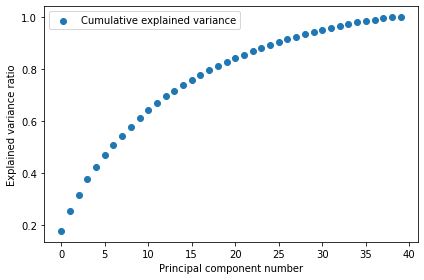

In [127]:
exp_var_pca = pca_words.explained_variance_ratio_

# Cumulative sum of eigenvalues to visualize factor loadings

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.scatter(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues,label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component number')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Analysis:

As per the 75% rule, it's safer to use 20 components as they explain a significant amount of variance in our data

In [128]:
# Fit PCA
pca = PCA(n_components=20)
pca_w2v = pca.fit_transform(word_vectors)

In [129]:
#Create pandas df for plotting
pca_df = pd.DataFrame(data = pca_w2v[:,0:2], 
                                  columns = ['principal component 1', 'principal component 2'])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

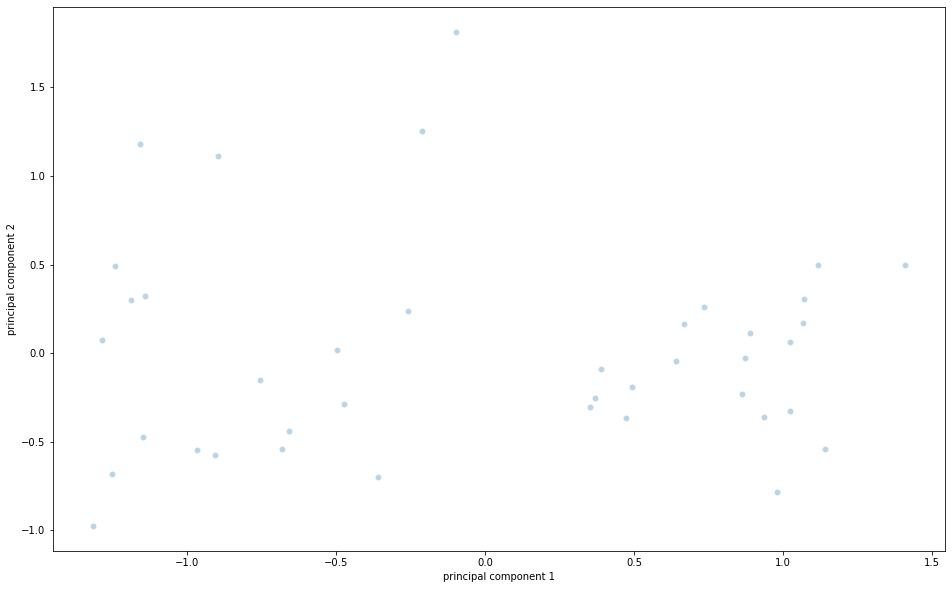

In [130]:
#Plot PC1 vs PC2
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

## Analysis:
We see two visible clusters on either side of 0 in PC1. They are likely representations of the differences between the words 'interesting' and 'boring'. Clear opposites are very unlikely to have any similarity.
